tarea con datos de la api

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [4]:
pip install wordcloud

     |████████████████████████████████| 366 kB 12.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

     |████████████████████████████████| 636 kB 15.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
api = pd.read_csv("https://testutmdavidguemez.s3.amazonaws.com/basedatos.csv")


In [12]:

api.shape


(5, 5)

In [14]:
api.head(5)

,Unnamed: 0,quote_id,quote_desc,quote_type,author
0,0,1,It always seem impossible until it is done.,Motivation,Nelson Mandela
1,1,2,With the new day comes new strength and new th...,Motivation,Eleanor Roosevelt
2,2,3,The secret of getting ahead is getting started.,Motivation,Mark Twain
3,3,4,With self-discipline most anything is possible.,Inspiration,Theodore Roosevelt
4,4,5,It is during our darkest moments that we must ...,Inspiration,Aristotle


In [15]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5 non-null      int64 
 1   quote_id    5 non-null      int64 
 2   quote_desc  5 non-null      object
 3   quote_type  5 non-null      object
 4   author      5 non-null      object
dtypes: int64(2), object(3)
memory usage: 328.0+ bytes


In [13]:


api.columns


Index(['Unnamed: 0', 'quote_id', 'quote_desc', 'quote_type', 'author'], dtype='object')

In [28]:
columns = ['Unnamed: 0', 'quote_type', 'author']
 
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))


In [29]:
df

,quote_id,quote_desc
0,1,It always seem impossible until it is done.
1,2,With the new day comes new strength and new th...
2,3,The secret of getting ahead is getting started.
3,4,With self-discipline most anything is possible.
4,5,It is during our darkest moments that we must ...


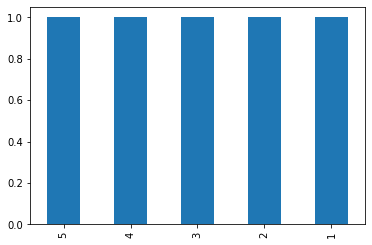

In [30]:
df['quote_id'].value_counts().plot(kind='bar')


In [31]:
df

,quote_id,quote_desc
0,1,It always seem impossible until it is done.
1,2,With the new day comes new strength and new th...
2,3,The secret of getting ahead is getting started.
3,4,With self-discipline most anything is possible.
4,5,It is during our darkest moments that we must ...


In [32]:
## Change the reviews type to string
df['quote_desc'] = df['quote_desc'].astype(str)
 

In [33]:
## Before lowercasing 
df['quote_desc'][2]

'The secret of getting ahead is getting started.'

In [34]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [35]:
df['quote_desc'][2] ## to see the difference


'the secret of getting ahead is getting started.'

###  Special characters
Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>\|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.



In [36]:
df['quote_desc'] = df['quote_desc'].str.replace('[^\w\s]','')


In [38]:
df['quote_desc'][2]


'the secret of getting ahead is getting started'

##  Stopwords
Stop-words being most commonly used in the English language; however, these words have no predictive power in reality. Words such as I, me, myself, he, she, they, our, mine, you, yours etc.



In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stop = stopwords.words('english')

In [22]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [42]:
df['quote_desc'][2]

'the secret of getting ahead is getting started'

###  Stemming
Stemming algorithm is very useful in the field of text mining and helps to gain relevant information as it reduces all words with the same roots to a common form by removing suffixes such as -action, ing, -es and -ses. However, there can be problematic where there are spelling errors.



In [44]:
st = PorterStemmer()


In [45]:
df['quote_desc'] = df['quote_desc'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [46]:
df['quote_desc'][2]

'the secret of get ahead is get start'

In [47]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

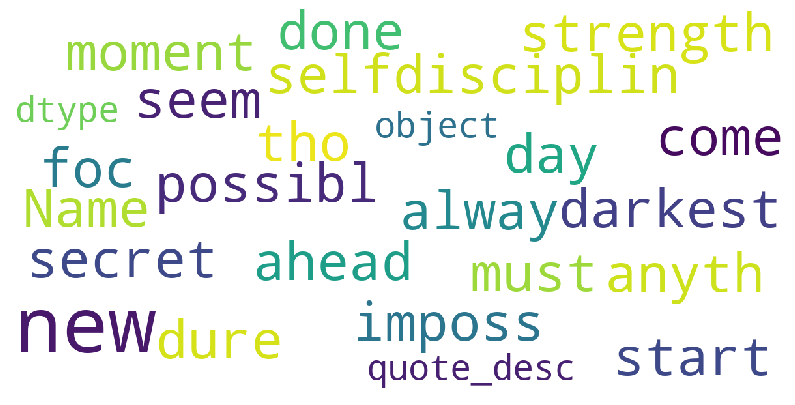

In [48]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['quote_desc']) 

In [49]:
def senti(x):
    return TextBlob(x).sentiment  
 
df['senti_score'] = df['quote_desc'].apply(senti)
 


In [50]:
df.senti_score.head()

0                                    (0.0, 0.0)
1    (0.13636363636363635, 0.45454545454545453)
2                                   (-0.4, 0.7)
3                                    (0.5, 0.5)
4                                    (0.4, 0.7)
Name: senti_score, dtype: object

In [51]:
df

,quote_id,quote_desc,senti_score
0,1,it alway seem imposs until it is done,"(0.0, 0.0)"
1,2,with the new day come new strength and new tho...,"(0.13636363636363635, 0.45454545454545453)"
2,3,the secret of get ahead is get start,"(-0.4, 0.7)"
3,4,with selfdisciplin most anyth is possibl,"(0.5, 0.5)"
4,5,it is dure our darkest moment that we must foc...,"(0.4, 0.7)"
